Checkpoint Objective
Regression 
This is a dataset containing over 21613 houses and their characteristics. The goal is to find the best model to predict a house’s price. 

 

1. Explore this dataset using what you have learned in data preprocessing and data visualization 

In [39]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures 

In [40]:
df = pd.read_csv('kc_house_data.csv', sep = ',')

In [41]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

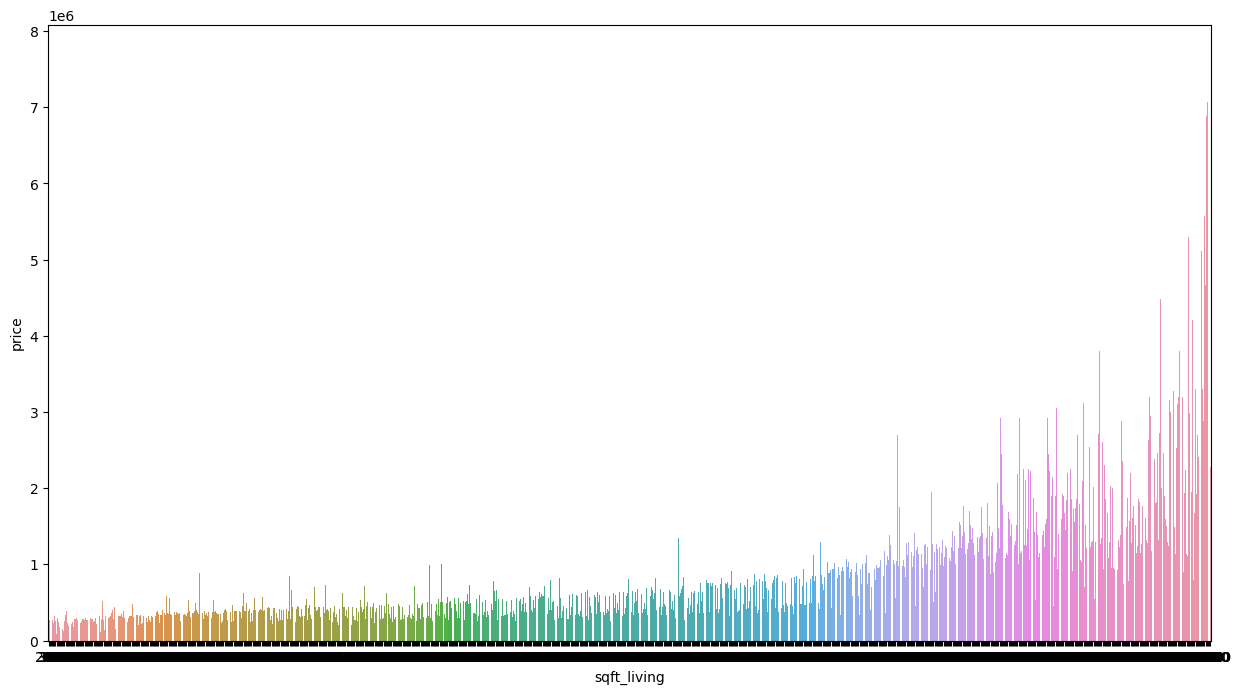

In [43]:
plt.figure(figsize=(15,8))
sns.barplot(data = df, x = 'sqft_living', y = 'price',ci = None);
# visualizing the correlation between sqft living and price

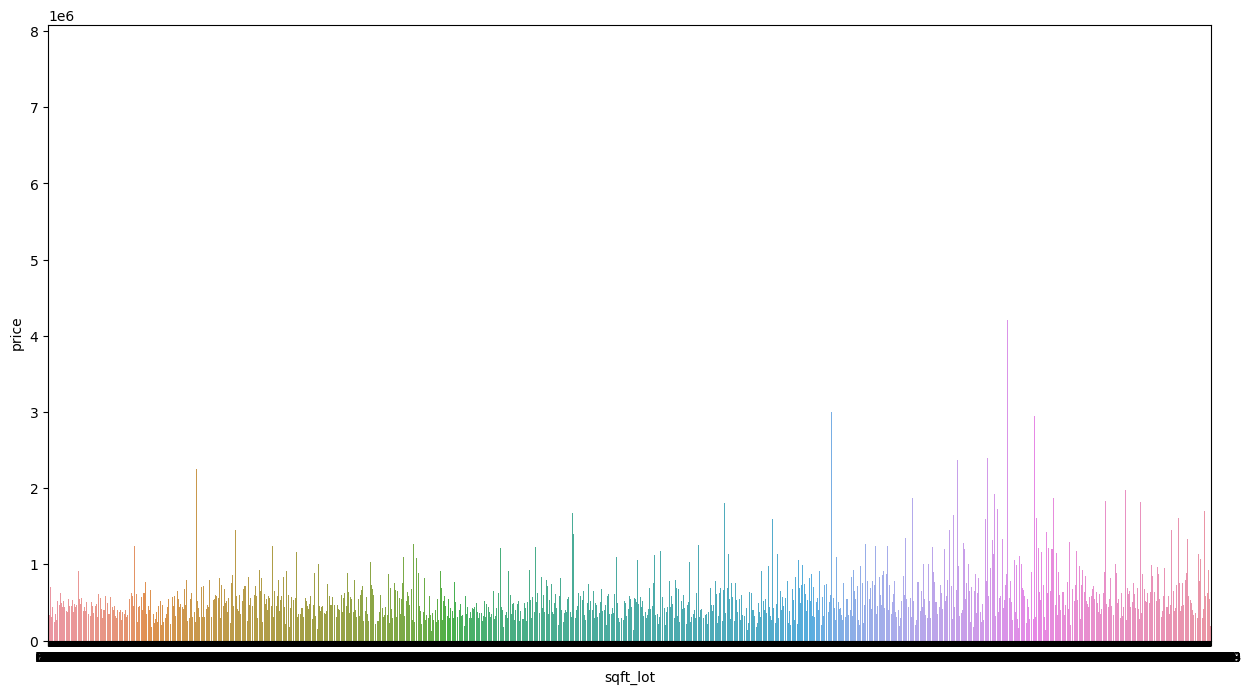

In [44]:
plt.figure(figsize=(15,8))
sns.barplot(data = df, x = 'sqft_lot', y = 'price', ci = None);
# visualizing the correlation between sqft lot and price

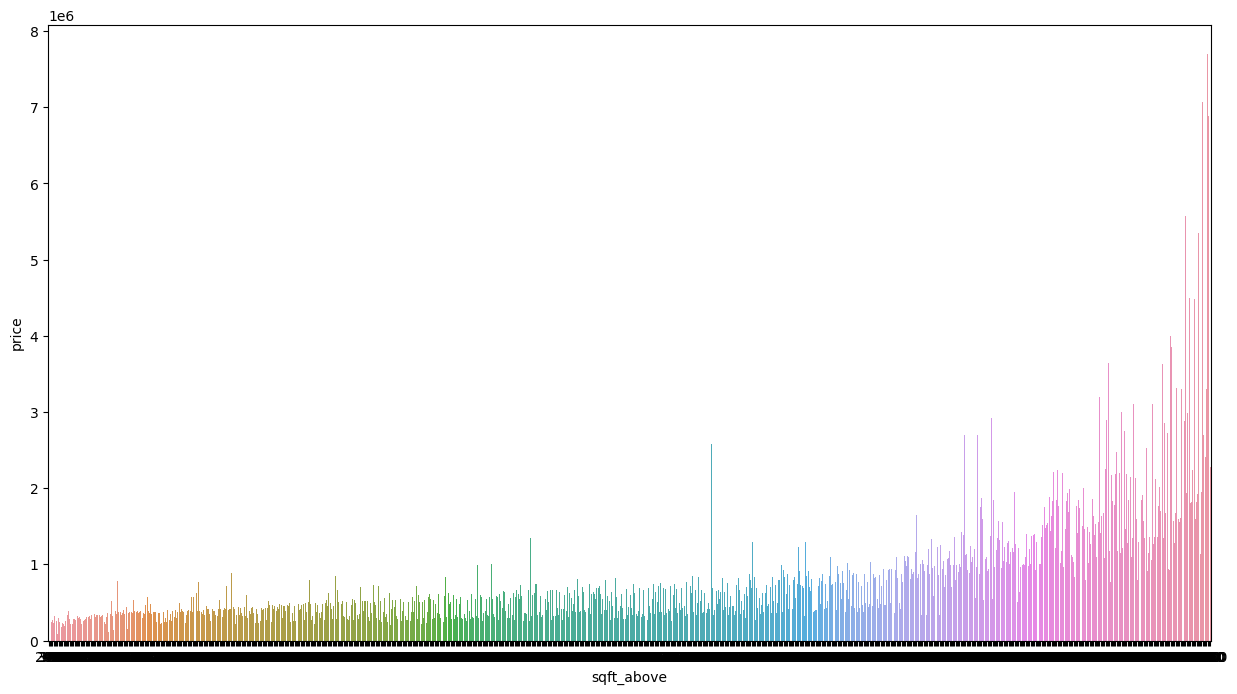

In [45]:
plt.figure(figsize=(15,8))
sns.barplot(data = df, x = 'sqft_above', y = 'price', ci = None);
# visualizing the correlation between sqft above and price

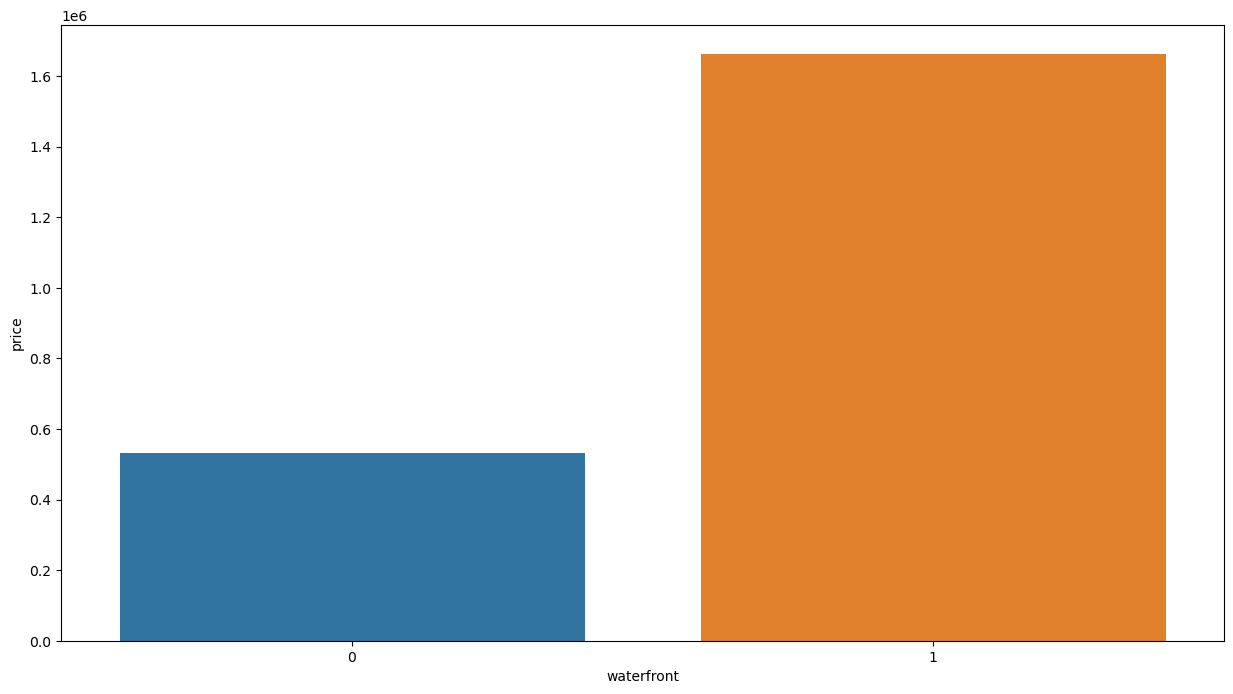

In [46]:
plt.figure(figsize=(15,8))
sns.barplot(data = df, x = 'waterfront', y = 'price', ci = None);
# visualizing correlation betwwen water front and price

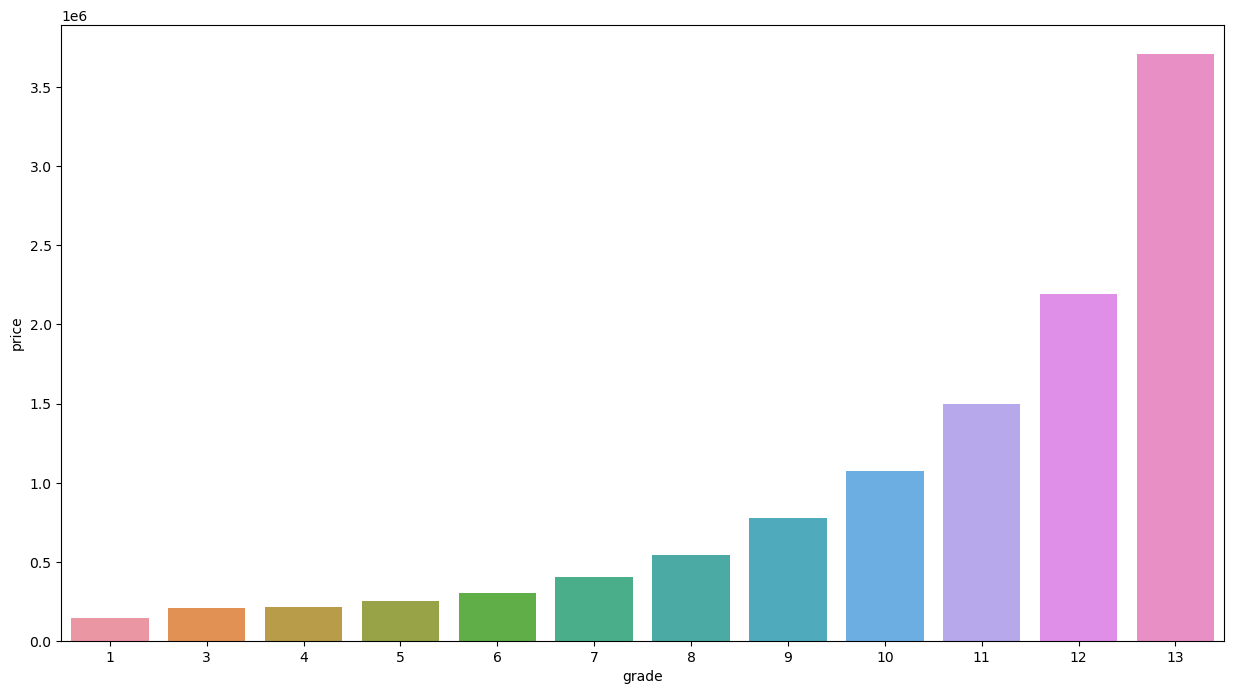

In [47]:
plt.figure(figsize=(15,8))
sns.barplot(data = df, x = 'grade', y = 'price', ci= None);
# visualizing the correlation between grade and price

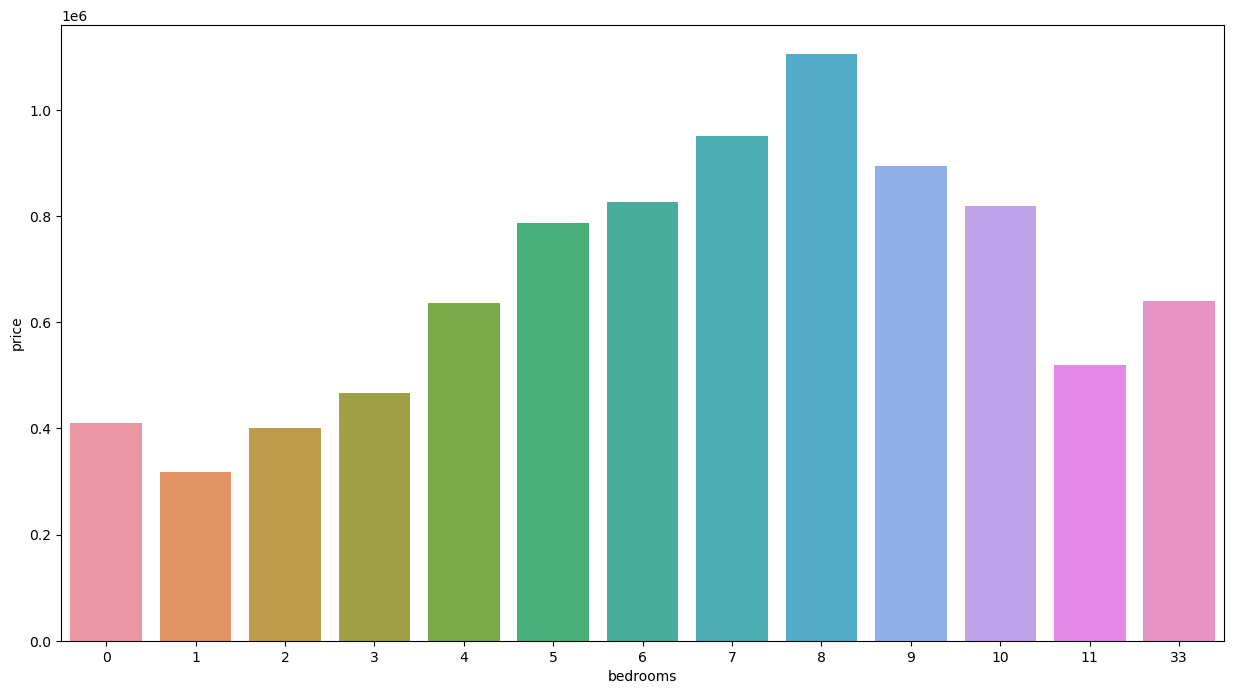

In [48]:
plt.figure(figsize=(15,8))
sns.barplot(data = df, x = 'bedrooms', y = 'price', ci= None);
# visualizing correlation between number of bedrroms and price

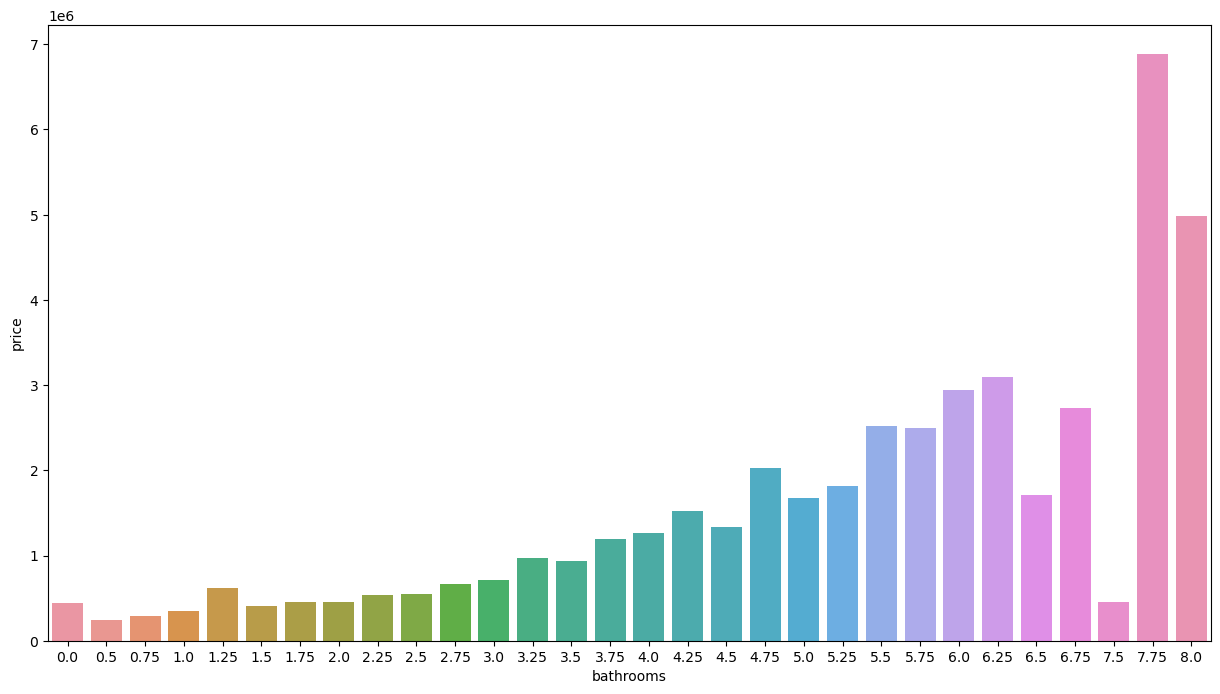

In [49]:
plt.figure(figsize=(15,8))
sns.barplot(data = df, x = 'bathrooms', y = 'price', ci= None);
# visualizing the correlation between number of bathrooms and price

In [50]:
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 20 , 20 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }
    )


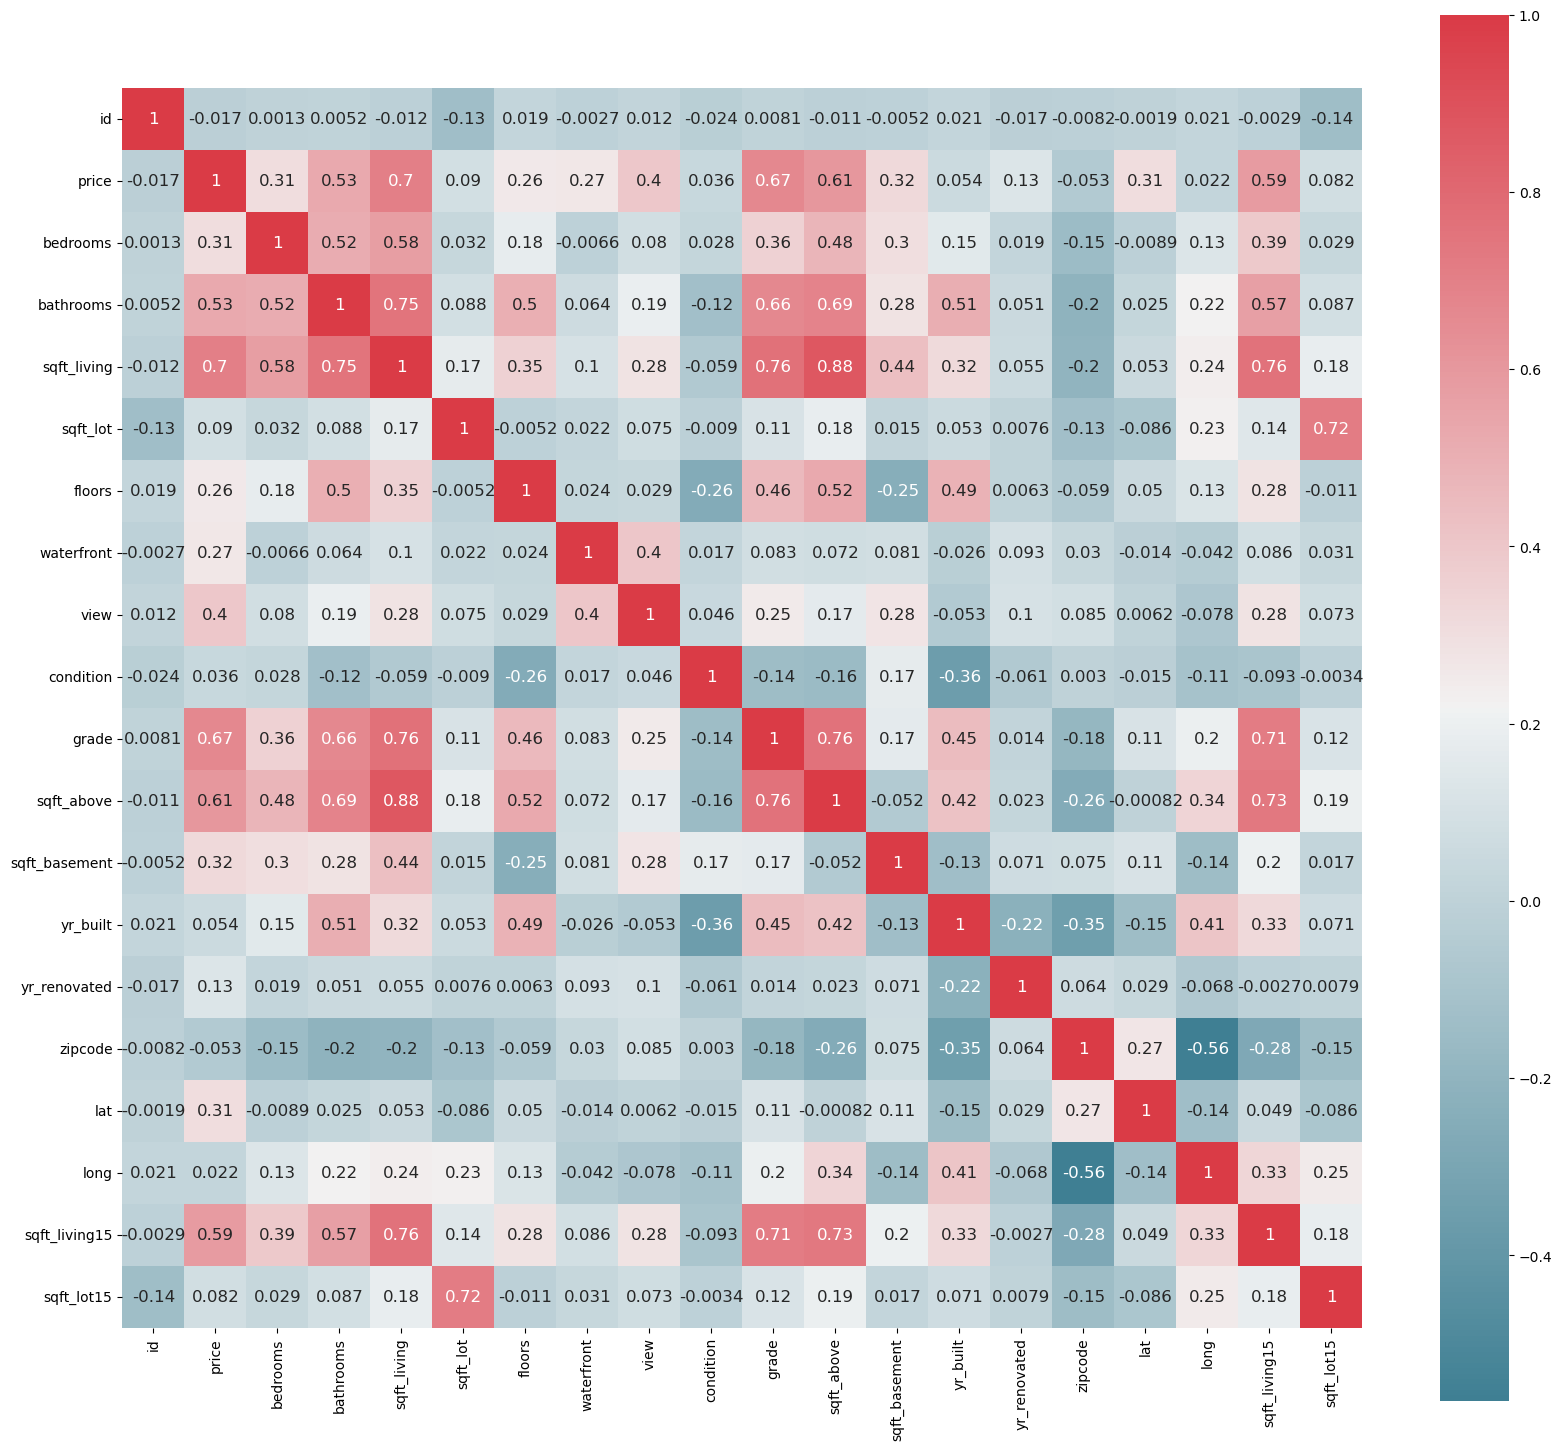

In [51]:
plot_correlation_map(df)

2. Write a paragraph selecting the most important features (feature selection). 

3. Split your dataset into a training set and a testing set. 

In [52]:
# simple linear regression of grade and price
x= df['price'].values[:,np.newaxis]
y= df['grade'].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2 , random_state = 30)

4. Apply linear regression to your training set. 

In [53]:
model=LinearRegression()   
model.fit(x_train,y_train)

LinearRegression()

5. Plot the linear regression. 

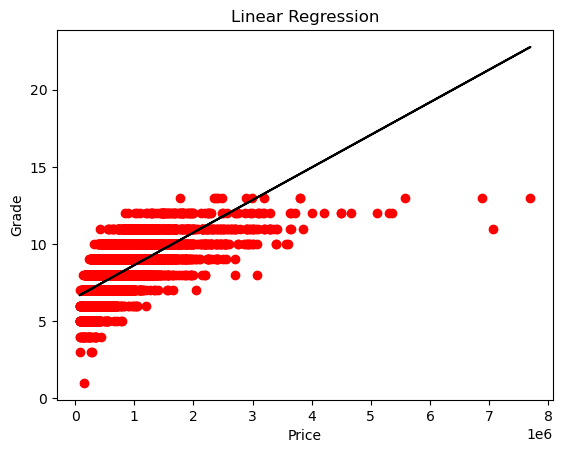

In [54]:
plt.scatter(x,y,color= 'r')
plt.title('Linear Regression')
plt.ylabel('Grade')
plt.xlabel('Price')
plt.plot(x,model.predict(x),color="k")
plt.show()

6. Measure the performance of linear regression using the testing set. 

In [55]:
predicted=model.predict(x_test)
print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

MSE 0.7230786931074472
R squared 0.4674176330336558


In [57]:
# simple linear regression of waterfront and price
x= df['price'].values[:,np.newaxis]
y= df['waterfront'].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2 , random_state = 30)
model=LinearRegression()   
model.fit(x_train,y_train)
predicted=model.predict(x_test)
print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

MSE 0.007399854825820981
R squared 0.10393877136834728


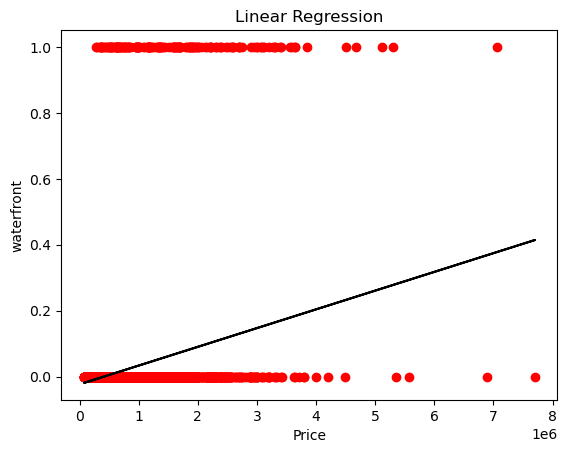

In [58]:
plt.scatter(x,y,color= 'r')
plt.title('Linear Regression')
plt.ylabel('waterfront')
plt.xlabel('Price')
plt.plot(x,model.predict(x),color="k")
plt.show()

7. Apply multiple-linear regression and compare it to the linear model. 

In [59]:
x= df['price'].values[:,np.newaxis]
y= df[['bedrooms', 'bathrooms']].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=40)

model=LinearRegression() 
model.fit(x_train,y_train) 
predicted=model.predict(x_test) 

print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

MSE 0.6410012267875418
R squared 0.19069962988632888


8. Apply polynomial regression and compare it to linear and multilinear regression. 

In [60]:
x= df[['price']].values
y= df[['sqft_living', 'sqft_lot', 'sqft_above']]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.35, random_state=40) 
lg=LinearRegression()
poly=PolynomialFeatures(degree=3)

x_train_fit = poly.fit_transform(x_train)
lg.fit(x_train_fit, y_train)
x_test_ = poly.fit_transform(x_test)
predicted = lg.predict(x_test_)

print("MSE: ", metrics.mean_squared_error(y_test, predicted))
print("R squared: ", metrics.r2_score(y_test,predicted))

MSE:  477605331.08553296
R squared:  0.30776350624210064
